# Deep Learning with Keras

Lets walk through building a very simple Deep Neural Network for our Tabular datasets.

First, lets take a quick walk-through of [Keras](https://keras.io).


## Tabular Data

I've copied all of my functions that loaded and visualized the data from from my previous notbook into a module, so that I can use them here:

In [1]:
from dataloader import *

In [2]:
d1=load_dataset(binary_classification_datasets[7])

Number of catogory 0: 4026
Number of catogory 1: 3999
Found 10 features. Creating grid of 4 by 3
fLength: KS Distribution Similarity Test: 0.23486721158680132
fWidth: KS Distribution Similarity Test: 0.21895041569632348
fSize: KS Distribution Similarity Test: 0.12879207134123322
fConc: KS Distribution Similarity Test: 0.07822205178716438
fConc1: KS Distribution Similarity Test: 0.07516092883131364
fAsym: KS Distribution Similarity Test: 0.16385560622644485
fM3Long: KS Distribution Similarity Test: 0.1969147279368277
fM3Trans: KS Distribution Similarity Test: 0.1055329033450613
fAlpha: KS Distribution Similarity Test: 0.45540930687217257
fDist: KS Distribution Similarity Test: 0.07662981319100266


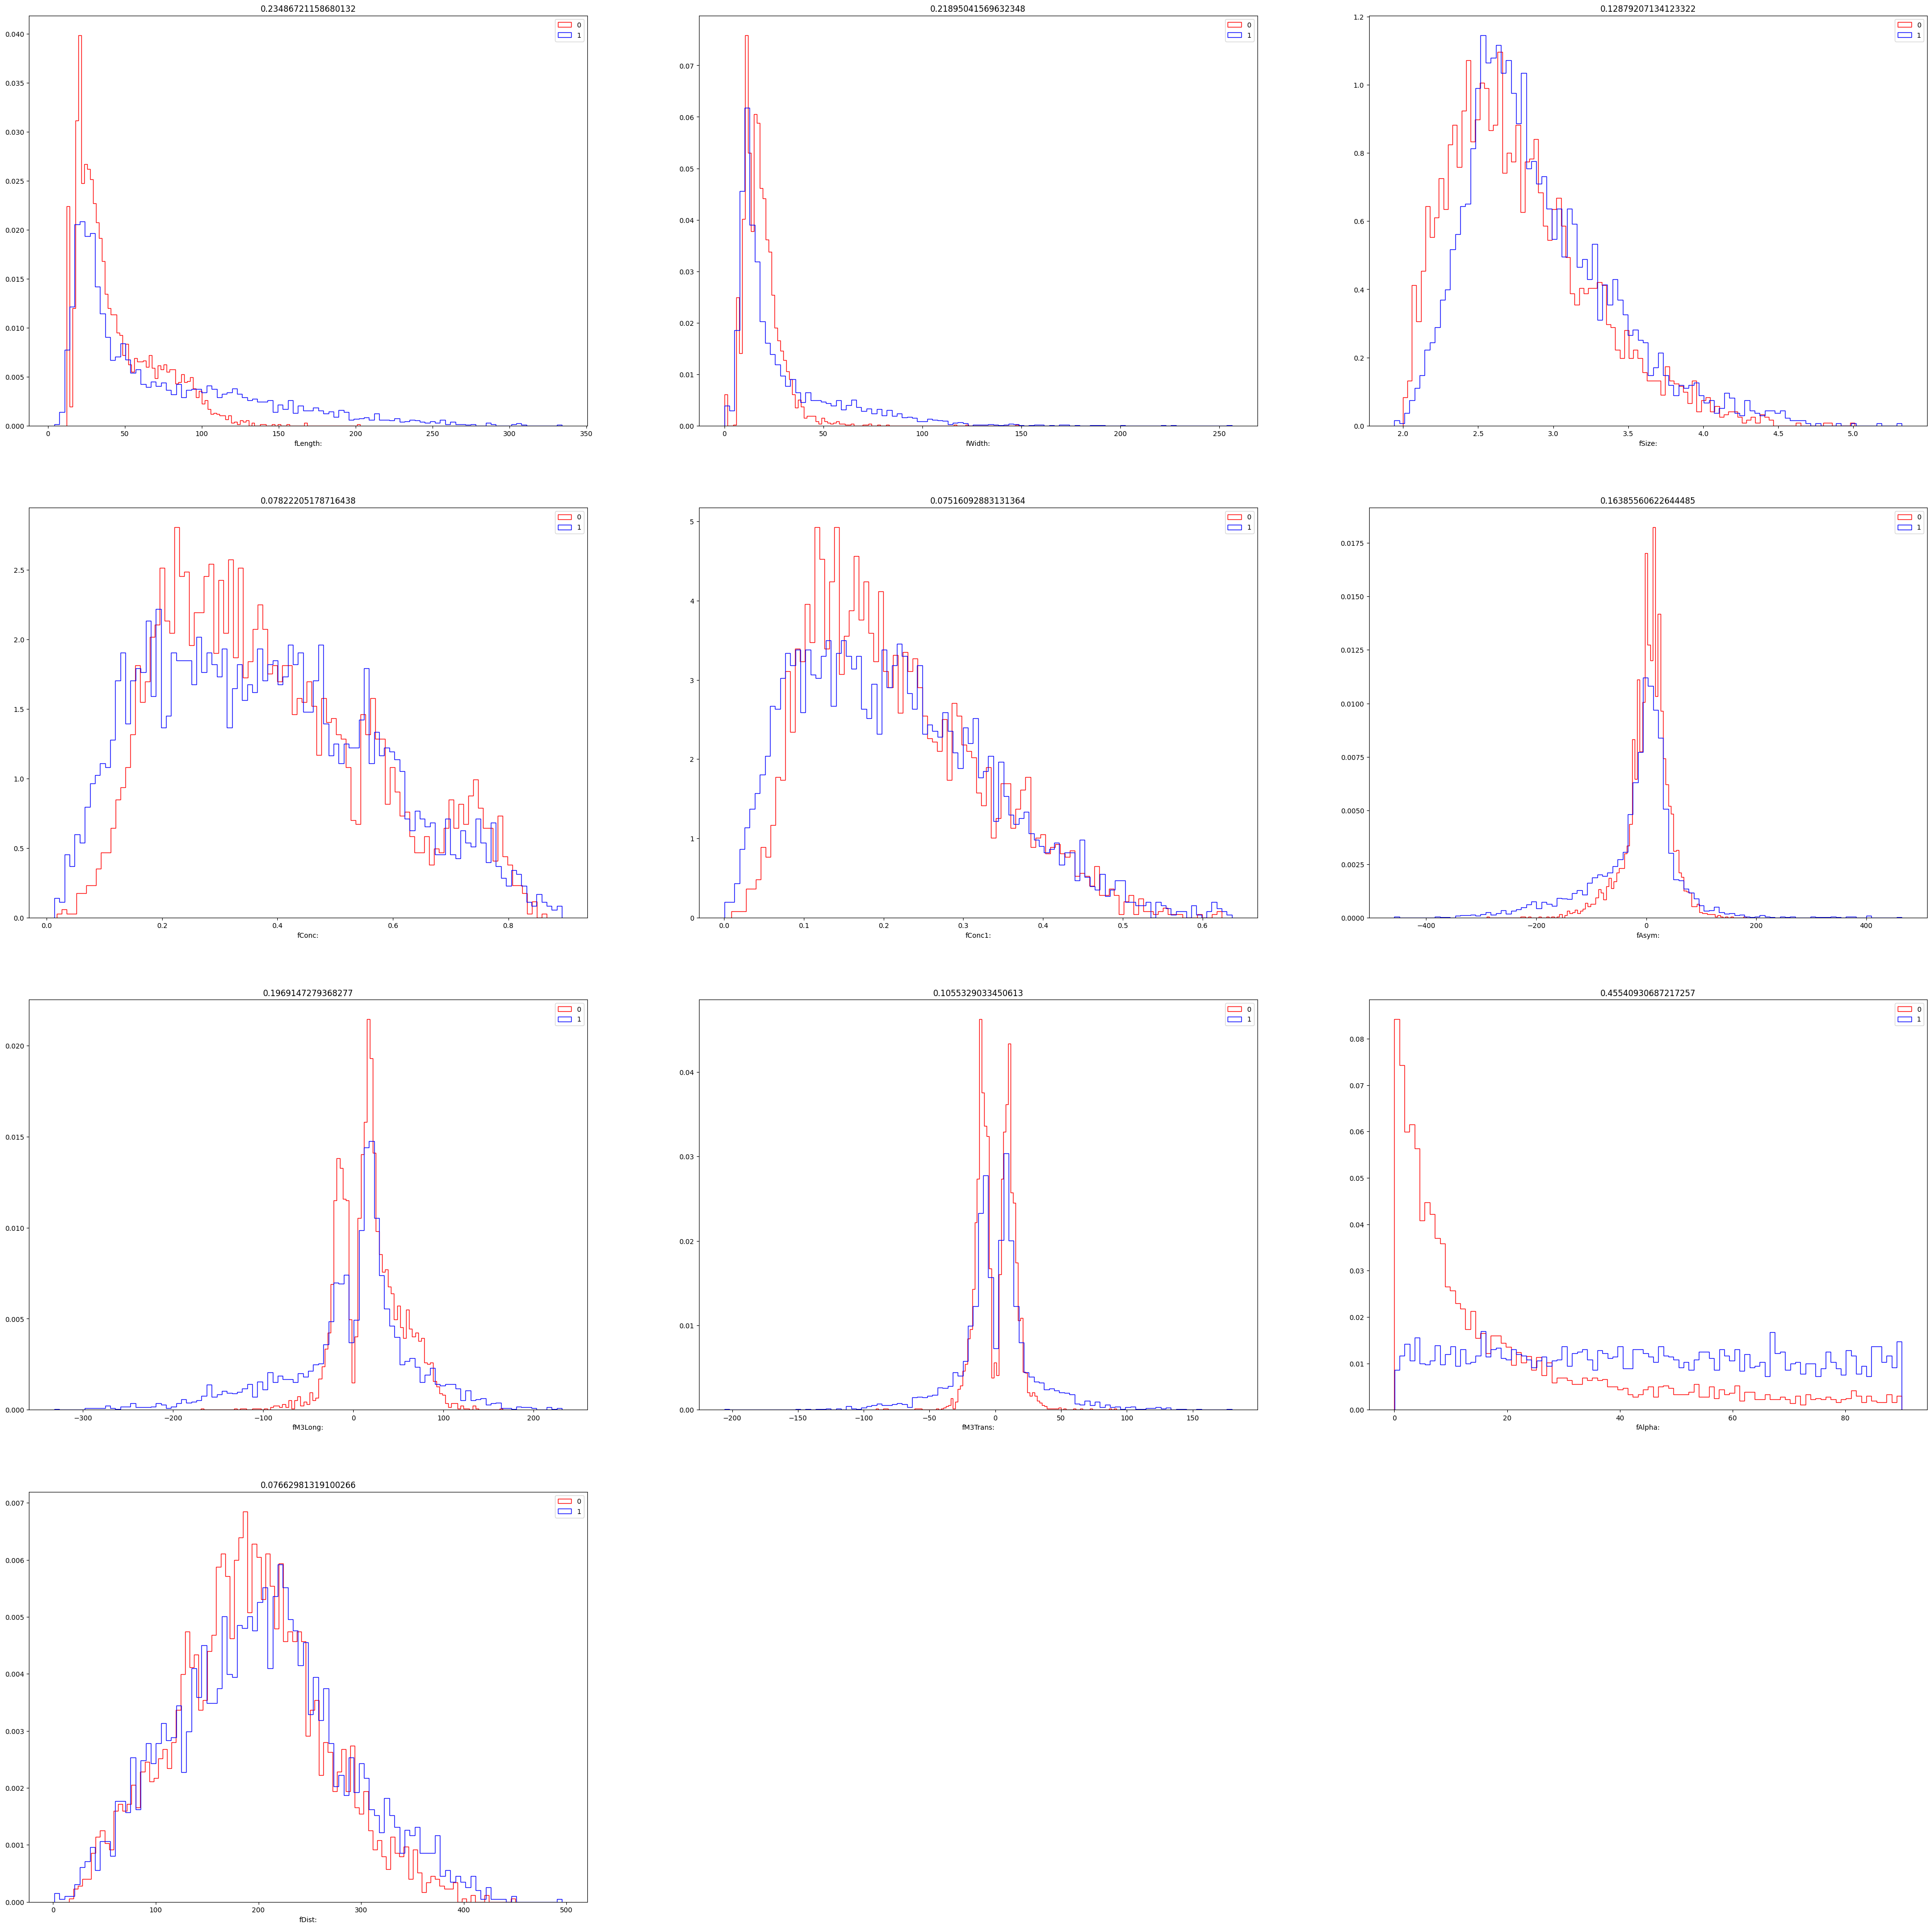

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
compare_features_binary(d1)

Quickly, we'll split our data into Training and Test subsets:

In [4]:
import math

N_total = d1["Training"].shape[0]
N_train = math.floor(.8*N_total)
N_val = math.floor((N_total-N_train)/2.)
N_test = math.floor((N_total-N_train)/2.)

X_Train = d1["Training"][:N_train]
y_Train = d1["Target"][:N_train]

X_val = d1["Training"][N_train:N_val+N_train]
y_val = d1["Target"][N_train:N_val+N_train]
                     
X_Test = d1["Training"][N_train+N_val:N_test+N_val+N_train]
y_Test = d1["Target"][N_train+N_val:N_test+N_val+N_train]

N_val

802

## Building our first model

Here's our first model:

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=X_Train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/afarbin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Here we are specifying a few of the hyperparameters:

* The network architecture: we have 3 hidden layers, with 12, 8, and 8 neurons in each, respectively.
* We selected ReLU for the activations in the hidden layers.
* Because we are doing binary classifications, we selected sigmoid as the output activation.

Recall that the output activation corresponds to your task:
* Binary Classification: sigmoid
* Multi-class classification: softmax
* Regression: linear

Now let's quickly make sure we understand the number of parameters in our model. The number of input features:

In [6]:
X_Train.shape[1]

10

Lets quickly compute the number of parameters we expect in our model, layer by layer:

In [7]:
# 1st Hidde layer
X_Train.shape[1]*12 + 12

132

In [8]:
# 2nd Hidden layer
12 * 8 + 8

104

In [9]:
y_Train.to_numpy().astype("float")

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [10]:
# 3rd Hidden layer
8 * 8 + 8

72

You can have Keras print out the model for you to investigate:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 317 (1.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The preferred method of creating a model is to use functional API, where the Deep Neural Network is viewed as a composition of functions. With this API, you can create very sophisticated models with multiple inputs and outputs.

In [12]:
from keras.models import Model
from keras.layers import Dense, Input

in_x = Input(shape = X_Train.shape[1:])
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8, activation='relu')(x)
x = Dense(8, activation='relu')(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 12)                132       
                                                                 
 dense_5 (Dense)             (None, 8)                 104       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 317 (1.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Few things to notice:
* Activations can be specified here, but can be added as their own layers.
* Note that in most cases where you are using existing Keras components with their default configuration, you can just specify the object you want by name. If you want to change a default, you'll have to create an instance of the object.

Since we haven't done any data normalization, we'll also add a layer to the model that does the normalization:

In [13]:
from keras.activations import relu
import keras

in_x = Input(shape = X_Train.shape[1:])
x = keras.layers.Normalization(axis=-1)(in_x)
x = Dense(12, input_dim=X_Train.shape[1], activation='relu')(in_x)
x = Dense(8)(x)
x = relu(x)
out_x = Dense(1, activation='sigmoid')(x)

model = Model(in_x,out_x)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                132       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 245 (980.00 Byte)
Trainable params: 245 (980.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Once the DNN has been specified, we will have to further forumlate our problem by specifing the loss (the parameter which will be optimized during training), and the optimizer (the optimization algorithm). In Keras, these are specified at "compile" time:

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Quick guide for selecting loss function:

* Binary Classification: binary_crossentropy
* Multi-class classification: categorical_crossentropy
* Regression: MSE

Note that we also specified a metric which Keras will compute for us during training so we can keep track of the progress of training. 

Few things to define and be aware of before we train:

* An epoch is defined as one training pass using the whole training data.
* Epochs are broken into smaller steps. At each step a subset of the training data, referred to as a batch, is used to compute the gradients perform an optimization step. Taking many steps is an example of stochastic gradient decent, which is an important ingredient to getting Deep Learning working.
* In order to monitor the training process, we typically compare the performance on the training sample and another sample (validation sample in Keras).

The easiest way to train is to use the `fit` method:

In [15]:
history=model.fit(X_Train.to_numpy().astype("float"), 
                  y_Train.to_numpy().astype("float"), 
                  validation_data=(X_Test.to_numpy(),y_Test.to_numpy()), 
                  epochs=100, batch_size=10)

Epoch 1/100
642/642 [==============================] - 1s 573us/step - loss: 2.8548 - accuracy: 0.5894 - val_loss: 0.7401 - val_accuracy: 0.6995
Epoch 2/100
642/642 [==============================] - 0s 436us/step - loss: 0.5958 - accuracy: 0.7227 - val_loss: 0.5949 - val_accuracy: 0.7195
Epoch 3/100
642/642 [==============================] - 0s 428us/step - loss: 0.5388 - accuracy: 0.7411 - val_loss: 0.5408 - val_accuracy: 0.7519
Epoch 4/100
642/642 [==============================] - 0s 430us/step - loss: 0.5187 - accuracy: 0.7450 - val_loss: 0.4955 - val_accuracy: 0.7643
Epoch 5/100
642/642 [==============================] - 0s 430us/step - loss: 0.5006 - accuracy: 0.7586 - val_loss: 0.5233 - val_accuracy: 0.7481
Epoch 6/100
642/642 [==============================] - 0s 429us/step - loss: 0.4840 - accuracy: 0.7673 - val_loss: 0.4898 - val_accuracy: 0.7556
Epoch 7/100
642/642 [==============================] - 0s 431us/step - loss: 0.4742 - accuracy: 0.7690 - val_loss: 0.4811 - val_ac

642/642 [==============================] - 0s 433us/step - loss: 0.4177 - accuracy: 0.8028 - val_loss: 0.4548 - val_accuracy: 0.7743
Epoch 58/100
642/642 [==============================] - 0s 426us/step - loss: 0.4149 - accuracy: 0.7994 - val_loss: 0.4377 - val_accuracy: 0.7930
Epoch 59/100
642/642 [==============================] - 0s 428us/step - loss: 0.4163 - accuracy: 0.7988 - val_loss: 0.4287 - val_accuracy: 0.7905
Epoch 60/100
642/642 [==============================] - 0s 427us/step - loss: 0.4160 - accuracy: 0.8012 - val_loss: 0.4418 - val_accuracy: 0.7855
Epoch 61/100
642/642 [==============================] - 0s 429us/step - loss: 0.4139 - accuracy: 0.8048 - val_loss: 0.4344 - val_accuracy: 0.7918
Epoch 62/100
642/642 [==============================] - 0s 430us/step - loss: 0.4115 - accuracy: 0.7972 - val_loss: 0.4294 - val_accuracy: 0.7993
Epoch 63/100
642/642 [==============================] - 0s 432us/step - loss: 0.4117 - accuracy: 0.7978 - val_loss: 0.4290 - val_accuracy

Note that `fit` takes care of

* Running multiple epochs
* Dividing the data into batches
* Computing gradient on each batch
* Using optimizer to take step
* Evaluating performance on training and testing data
* Keep track of everything

But in some instances you may wish to consume data from a difference source (rather than a tensor in memory) or do something different (e.g. training an Adversarial network), which will require you to perform some of these steps yourself. Keras provides easy methods to enable such functionality.

The model history keeps track of the loss and accuracy for each epoch. Note that the training above was setup to run on the validation sample at the end of each epoch:

In [16]:
print (history.history)

{'loss': [2.85483980178833, 0.5958160161972046, 0.5387760996818542, 0.5187498331069946, 0.5006124973297119, 0.48399049043655396, 0.4742222726345062, 0.4720515310764313, 0.4643082618713379, 0.4643503427505493, 0.4599947929382324, 0.4547556936740875, 0.4552765488624573, 0.4489036500453949, 0.4491376280784607, 0.4516935348510742, 0.4464242458343506, 0.43984633684158325, 0.44632044434547424, 0.44046974182128906, 0.44730281829833984, 0.4408223032951355, 0.442382276058197, 0.43814462423324585, 0.43771892786026, 0.4354780912399292, 0.44041815400123596, 0.43453678488731384, 0.4346930980682373, 0.4368903338909149, 0.43181708455085754, 0.4331167936325073, 0.42860186100006104, 0.42984887957572937, 0.4284381866455078, 0.42889559268951416, 0.4264204502105713, 0.42005813121795654, 0.43262365460395813, 0.42230522632598877, 0.42640364170074463, 0.4254460632801056, 0.4201032817363739, 0.4184766113758087, 0.42072951793670654, 0.4207046926021576, 0.42142677307128906, 0.41753971576690674, 0.42594420909881

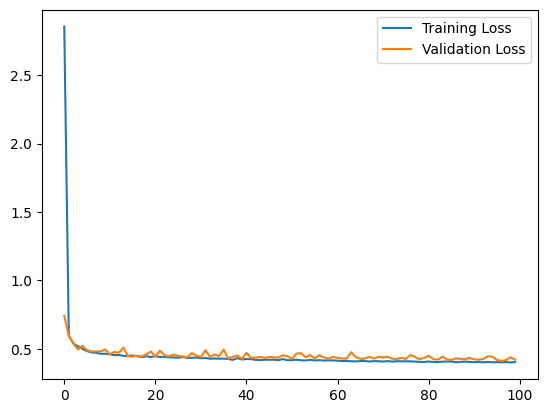

In [17]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

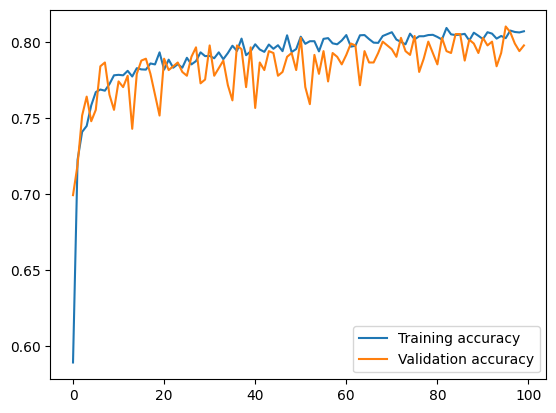

In [18]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

We can evaluate how the trained model does on the test sample as follows:

In [19]:
scores = model.evaluate(X_Test, y_Test)
print(scores)

26/26 [==============================] - 0s 517us/step - loss: 0.4217 - accuracy: 0.7980
[0.42171692848205566, 0.7980049848556519]


While evaluate is useful for assessing performance, once you have trained a model and determined you with to use it, you will want to apply to data without ground truth or the known desired output (in this case signal or background). `predict` enables this functionality:

In [20]:
model.predict(X_Test)

26/26 [==============================] - 0s 407us/step


array([[0.94302136],
       [0.3679193 ],
       [0.07087577],
       [0.99975705],
       [0.6748653 ],
       [0.50621116],
       [0.14780055],
       [0.97875017],
       [0.4245247 ],
       [0.6607282 ],
       [0.3987688 ],
       [0.42143318],
       [0.44250387],
       [0.5423775 ],
       [0.29790762],
       [0.30874917],
       [0.9999025 ],
       [0.98948413],
       [0.98679477],
       [0.56591845],
       [0.14889343],
       [0.30565393],
       [0.18236591],
       [0.98234475],
       [0.18182376],
       [0.83938724],
       [0.02528466],
       [0.2277459 ],
       [0.81727517],
       [0.9276891 ],
       [0.7493703 ],
       [0.12673023],
       [0.22093269],
       [0.5074469 ],
       [0.82107925],
       [0.23783518],
       [0.07197641],
       [0.5246065 ],
       [0.86095905],
       [0.96394974],
       [0.48586813],
       [0.8776818 ],
       [0.0480159 ],
       [0.30624908],
       [0.43986547],
       [0.553084  ],
       [0.60980356],
       [0.183

Note the output here is a number between 0 and 1. Determining what threshold to use to select signal is analgous to what we did for other ML methods.

Lets first look at the distribution of the output of the DNN to confirm visually that things are as we expect:

In [21]:
X_Test_0 = X_Test[(y_Test==0).to_numpy()]
X_Test_1 = X_Test[(y_Test==1).to_numpy()]

13/13 [==============================] - 0s 390us/step


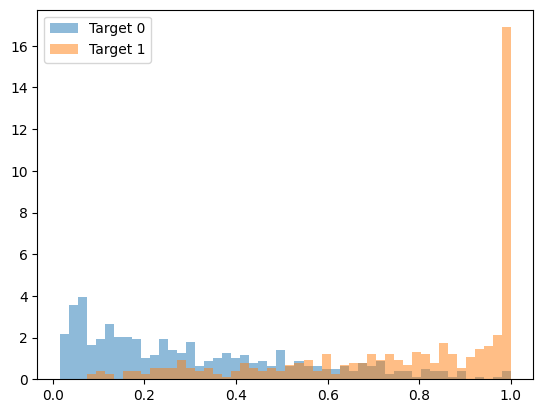

In [22]:
hist,bins,_= plt.hist(model.predict(X_Test_0),density=1,bins=50,alpha=0.5,label="Target 0")
hist,bins,_= plt.hist(model.predict(X_Test_1),density=1,bins=bins,alpha=0.5,label="Target 1")
plt.legend()

Next, we make ROC curves:

26/26 [==============================] - 0s 489us/step


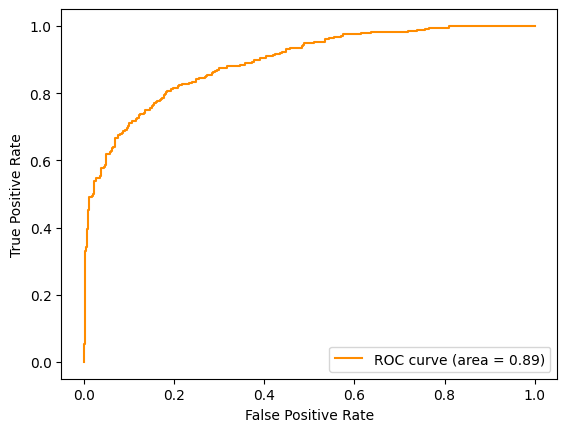

In [23]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Homework

Your homework is to create a new notebook modeled after this one, where:

* You've put all of your cleaning and prepration steps into a functions you load and use in a module.
* You create and train a simple appropriate model for your task.
* You assess the performance using the appropriate metric for your task.
* Compare the performance with your previous best non Deep Neural Network model. This probably will mean you copy and paste your training from your other notebook into this notebook.